<a href="https://colab.research.google.com/github/Abelbimaw/BioSpin-material/blob/main/Filter_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@import Plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#@ Import Audio
from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO 

(0.0, 0.1)

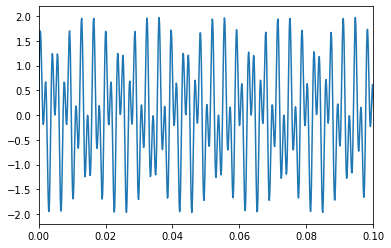

In [ ]:
# signal frekuensi 256 hz - 563 hz
fs  = 8000
t = np.arange(0, 5, step = 1./fs)
x = np.sin(2 * np.pi * 256 * t)
y = np.sin(2 * np.pi * 563 *t)
z = x+y

plt.plot(t,z)
plt.xlim(0, .1)

In [ ]:
Audio(z, rate = fs)

In [ ]:
 Z = np.fft.fft(z)
 Z

array([-4.69464792e-10+0.00000000e+00j,  6.96904808e-11-1.04164233e-10j,
       -2.63374920e-10-1.37850837e-10j, ...,
        9.39047156e-11+1.18023375e-10j, -2.63374920e-10+1.37850837e-10j,
        6.96709648e-11+1.04170054e-10j])

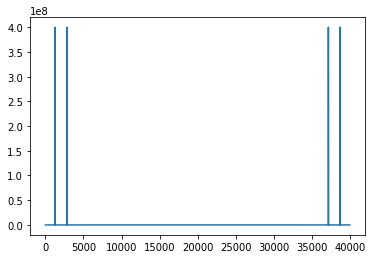

In [ ]:
X_pow = np.abs(Z) ** 2
plt.plot(X_pow)

(40000, 20000)

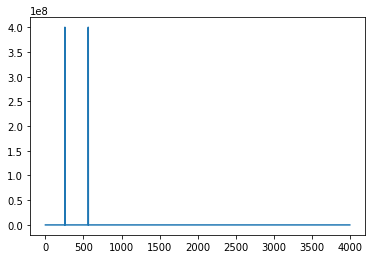

In [ ]:
N = len(X_pow)
f_pos = np.arange(0, fs /2 , step= fs/N)
plt.plot(f_pos, X_pow[:(N//2)])

N, len(f_pos)

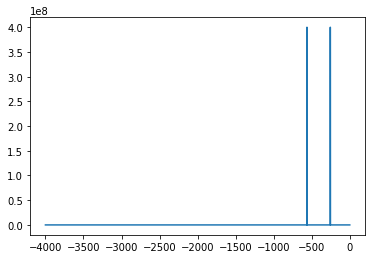

In [ ]:
f_neg = np.arange(-fs / 2, 0, step=fs/N)
plt.plot(f_neg, X_pow[(N//2):])

(-0.1, 1.1)

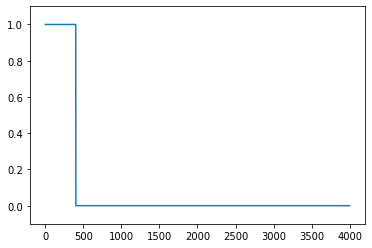

In [ ]:
f_pos = np.arange(0, fs/2, step = fs/N)
H_pos = 1. * (f_pos <= 400)
plt.plot(f_pos,H_pos)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

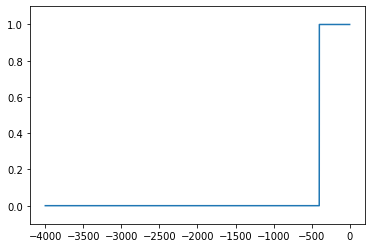

In [ ]:
f_neg = np.arange( -fs/2, 0,  step = fs/N)
H_neg = 1. * (f_neg >= -400)
plt.plot(f_neg,H_neg)
plt.ylim(-.1, 1.1)

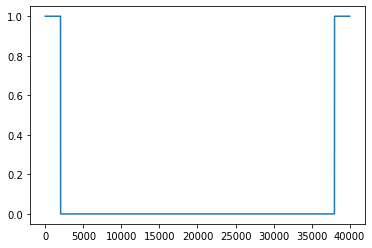

In [ ]:
H = np.concatenate([H_pos, H_neg])
plt.plot(H)

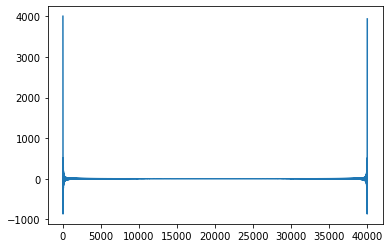

In [ ]:
H = np.real(np.fft.fft(H))
plt.plot(H)

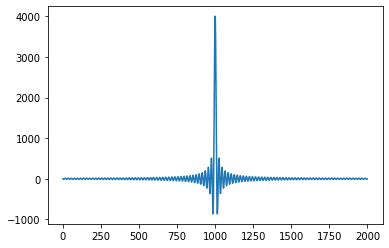

In [ ]:
H_trunc = np.concatenate([H[-1000:], H[:1000]])
plt.plot(H_trunc)

In [ ]:


y = np.convolve(z,H_trunc)

y = y[:-1]

(0.3, 0.4)

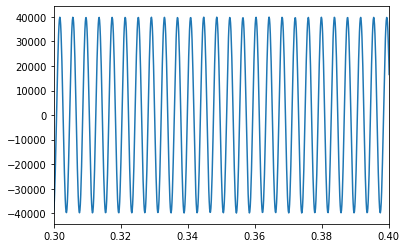

In [ ]:
N = len(y)
t = np.arange(0, N / fs, step = 1 /fs)
plt.plot(t, y)
plt.xlim(.3, .4)

In [ ]:
f_pos = np.arange(0, fs/2, step = fs/N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) **2

(0.0, 430.0)

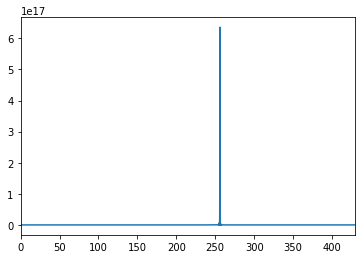

In [ ]:
plt.plot(f_pos, Y_pow[:(N//2)])
plt.xlim(0, 430)

In [ ]:
Audio(y, rate = fs)